In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#задание 2.3.1
url="https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv"
data = pd.read_csv(url, sep=',')
#просмотр первых 5 строк датасета
data.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#задание 2.3.1
url="https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv"
data = pd.read_csv(url, sep=',')
#информация о столбцах и типах датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#задание 2.3.1
url="https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv"
data = pd.read_csv(url, sep=',')
#базовые описательные статистики
data.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#задание 2.3.2
url="https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv"
data = pd.read_csv(url, sep=',')
#доля пропусков в каждом столбце
group=data.isna().mean()
print(group)


user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#задание 2.3.2
url="https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv"
data = pd.read_csv(url, sep=',')
#наличие полностью дублирующих строк
dublicated_check=data.duplicated()
print(dublicated_check)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#задание 2.3.2
url="https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv"
data = pd.read_csv(url, sep=',')
#«подозрительные» случаи
age_and_country=(data['age']<0) | (data['age']>100) | data['age'].isna() | data['country'].isna()
purchases=(data['purchases']<0)
null_purchases=(data['purchases']<=0) & (data['revenue']>0)
nl_purchases=(data['revenue']<=0) & (data['purchases']>0)

summary = age_and_country | purchases | null_purchases | nl_purchases
summary_line = data[summary]
print(summary_line)

#на строке 5 у 6 пользоватля отрицательный показатель покупок и его возраст 120 лет => скорее всего это ошибка в данных (подозрительная активность)
#на строке 10 у 11 пользователя 4 покупки при доходе 0, такое вряд ли может быть поэтому тоже отснесем к ошибке в данных (подозрительная активность)
#у 4 и 12 пользователя отсутвует возраст

    user_id    age country  purchases  revenue
4         5    NaN      DE          6     1296
5         6  120.0      FR         -1      785
10       11   24.0      US          4        0
12       13    NaN      US          9      630


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#задание 2.3.3
url="https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv"
data = pd.read_csv(url, sep=',')
#частоты
value_cnt=data['country'].value_counts()
print(value_cnt)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#задание 2.3.3
url="https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv"
data = pd.read_csv(url, sep=',')
#группировка
data_group  = data.groupby('country')[['revenue', 'purchases']].agg(['mean', 'sum'])
print(data_group)
#создаем доп группы
bins =[-1,200,500,1000,float('inf')]
group_names=['выживающие','сущетсвующие', 'средний класс', 'элита']
data['revenue_group'] = pd.cut(data['revenue'], bins=bins, labels=group_names)
print(data.groupby('revenue_group')['age'].mean())
print(data['revenue_group'].value_counts())
#вывод наибольшее кол-во покупок сделали в россиыи,и наименьшее в китае хоть они и на втором месте по доходу
#срдений возраст элиты это тридцать лет, обычно элита 40+ но таблица показыет обратное





             revenue        purchases    
                mean    sum      mean sum
country                                  
CN       1054.000000   2108  4.500000   9
DE       1445.500000   8673  6.500000  39
FR        675.916667   8111  4.250000  51
RU        790.076923  10271  4.769231  62
US        557.375000   4459  4.625000  37
revenue_group
выживающие       33.166667
сущетсвующие     39.000000
средний класс    42.000000
элита            30.583333
Name: age, dtype: float64
revenue_group
средний класс    14
элита            13
сущетсвующие      8
выживающие        6
Name: count, dtype: int64


C:\Users\Damir\AppData\Local\Temp\ipykernel_19120\1086360842.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(data.groupby('revenue_group')['age'].mean())


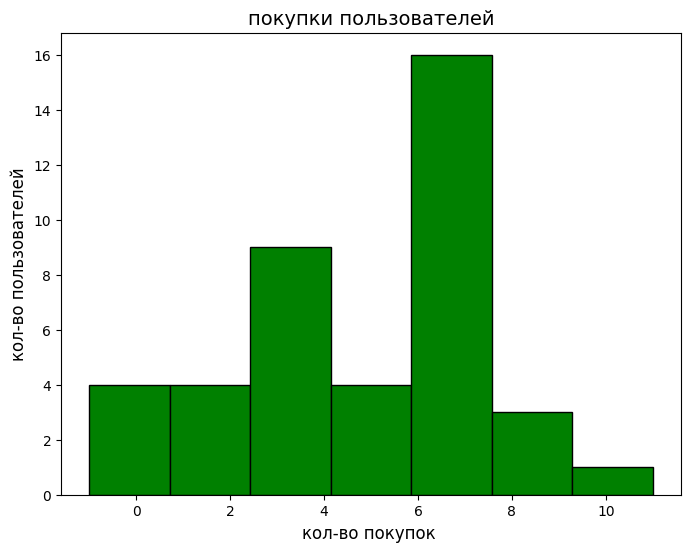

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv"
data = pd.read_csv(url)
purchases = data['purchases']
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.hist(purchases, bins='auto', edgecolor='black', color='green')
ax1.set_title('покупки пользователей', fontsize=14)
ax1.set_xlabel('кол-во покупок ', fontsize=12)
ax1.set_ylabel('кол-во пользователей', fontsize=12)
plt.show()


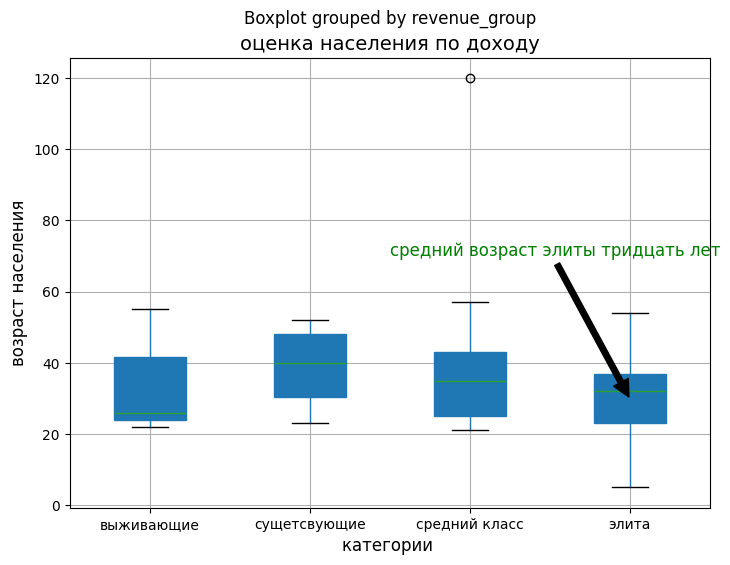

In [10]:

import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv"
data = pd.read_csv(url)
bins =[-1,200,500,1000,float('inf')]
group_names=['выживающие','сущетсвующие', 'средний класс', 'элита']
data['revenue_group'] = pd.cut(data['revenue'], bins=bins, labels=group_names)
purchases = data['purchases']
fig, ax = plt.subplots(figsize=(8,6))
data.boxplot(column='age', by='revenue_group',ax=ax,patch_artist=True)
ax.annotate('средний возраст элиты тридцать лет', 
            xy=(4, 30),           
            xytext=(2.5, 70),     
            arrowprops=dict(facecolor='black', shrink=0.01), 
            fontsize=12,
            color='green')
ax.set_title('оценка населения по доходу', fontsize=14)
ax.set_xlabel('категории ', fontsize=12)
ax.set_ylabel('возраст населения', fontsize=12)
plt.savefig("figures/boxplot.png")
plt.show()


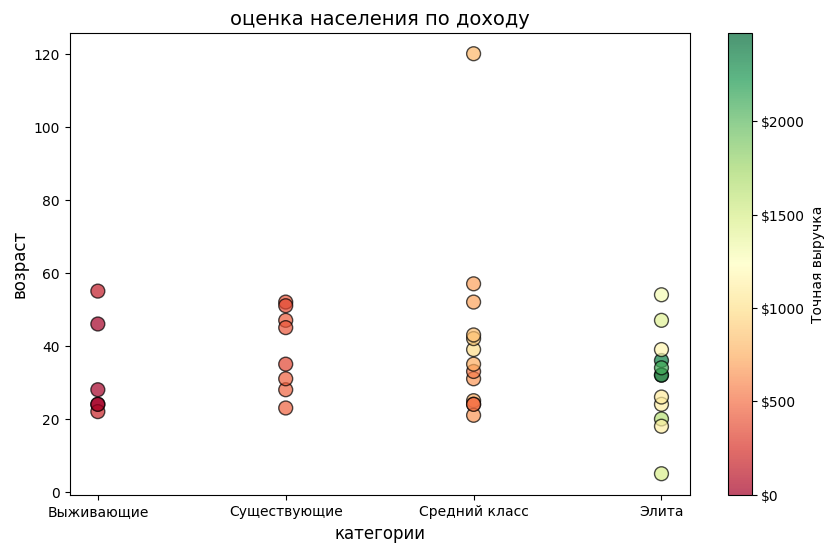

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/refs/heads/main/seminars/S02/S02-hw-dataset.csv"
data = pd.read_csv(url)
bins = [-1, 200, 500, 1000, float('inf')]
group_names = ['Выживающие', 'Существующие', 'Средний класс', 'Элита']
data['revenue_group'] = pd.cut(data['revenue'], bins=bins, labels=group_names)
fig, ax = plt.subplots(figsize=(10, 6))
sctr = ax.scatter(x=data['revenue_group'].cat.codes,
                  y=data['age'],
                  c=data['revenue'],
                  cmap='RdYlGn',
                  s=100,
                  edgecolors='black',
                  alpha=0.7)
plt.colorbar(sctr, ax=ax, label='Точная выручка', format='$%d')
ax.set_xticks(range(len(group_names)))
ax.set_xticklabels(group_names)
ax.set_title('оценка населения по доходу', fontsize=14)
ax.set_xlabel('категории', fontsize=12)
ax.set_ylabel('возраст', fontsize=12)

plt.show()